In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
from tensorflow.keras.layers import Input

In [6]:
model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(6, kernel_size=(5,5),activation='relu'),
    AveragePooling2D(pool_size=(2,2)),
    Conv2D(16, kernel_size=(5,5),activation='relu'),
    AveragePooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(120,activation='relu'),
    Dense(84,activation='relu'),
    Dense(10,activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.7401 - loss: 0.8872 - val_accuracy: 0.9539 - val_loss: 0.1559
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9603 - loss: 0.1349 - val_accuracy: 0.9673 - val_loss: 0.1067
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9724 - loss: 0.0902 - val_accuracy: 0.9744 - val_loss: 0.0858
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9781 - loss: 0.0698 - val_accuracy: 0.9795 - val_loss: 0.0698
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9806 - loss: 0.0586 - val_accuracy: 0.9785 - val_loss: 0.0728
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9838 - loss: 0.0523 - val_accuracy: 0.9843 - val_loss: 0.0565
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.9879 - loss: 0.0404 - val_accuracy: 0.9837 - val_loss: 0.0574
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9876 - loss: 0.0377 - val_

In [8]:
import matplotlib.pyplot as plt 

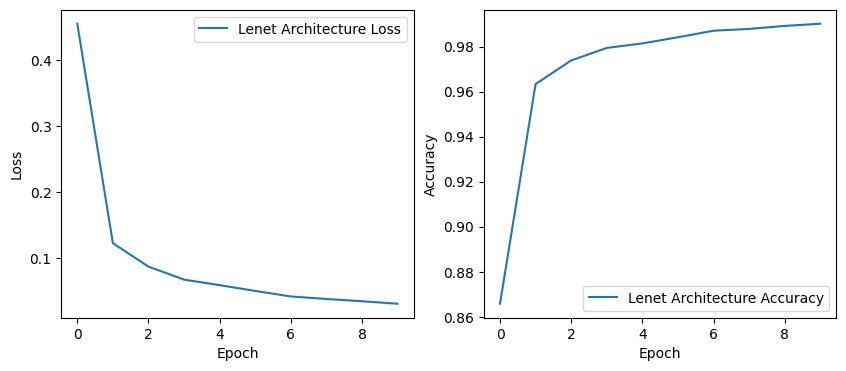

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.plot(history.history['loss'], label='Lenet Architecture Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Lenet Architecture Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Leenet for Cifar 10 dataset

In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [12]:
# (xc_train, yc_train), (xc_test, yc_test) = cifar10.load_data()
# xc_train = xc_train.reshape(-1,32,32,1).astype('float32') / 255.0
# xc_test = xc_test.reshape(-1,32,32,1).astype('float32') / 255.0
# yc_train = to_categorical(yc_train, 10)
# yc_test = to_categorical(yc_test, 10)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]
y_train, y_test = to_categorical(y_train), to_categorical(y_test)  # One-hot encode labels


In [13]:
from tensorflow.keras import layers, models

model2 = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
history = model2.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.2758 - loss: 1.9792 - val_accuracy: 0.4257 - val_loss: 1.5787
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.4514 - loss: 1.5119 - val_accuracy: 0.4985 - val_loss: 1.4064
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.5003 - loss: 1.3836 - val_accuracy: 0.5277 - val_loss: 1.3370
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 65ms/step - accuracy: 0.5396 - loss: 1.2984 - val_accuracy: 0.5509 - val_loss: 1.2776
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.5623 - loss: 1.2357 - val_accuracy: 0.5506 - val_loss: 1.2706
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 155ms/step - accuracy: 0.5751 - loss: 1.1996 - val_accuracy: 0.5711 - val_loss: 1.2149
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.5932 - loss: 1.1515 - val_accuracy: 0.5777 - val_loss: 1.2057
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 167ms/step - accuracy: 0.6113 - loss: 1.104

In [17]:
# 1st Convolutional Layer

from tensorflow.keras.layers import Activation

from tensorflow.keras.layers import BatchNormalization, MaxPooling2D

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, kernel_size=(3, 3), input_shape=(32, 32, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

In [18]:
#2nd convolutional layer
model.add(Conv2D(filters=256,kernel_size=(5,5),padding='valid',strides=(1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

ValueError: Computed output size would be negative. Received `inputs shape=(None, 3, 3, 256)`, `kernel shape=(5, 5, 256, 256)`, `dilation_rate=[1 1]`.

In [19]:
#3rd convolutional layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

ValueError: Computed output size would be negative. Received `inputs shape=(None, 3, 3, 256)`, `kernel shape=(5, 5, 256, 256)`, `dilation_rate=[1 1]`.

In [60]:
# 4th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [61]:
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

In [62]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10


ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 5 from 2 for '{{node sequential_11_1/conv2d_21_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_11_1/batch_normalization_1/batchnorm/add_1, sequential_11_1/conv2d_21_1/convolution/ReadVariableOp)' with input shapes: [?,2,2,96], [5,5,96,256].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(None, 2, 2, 96), dtype=float32)

In [ ]:
# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# Output Layer
model.add(Dense(10))  # CIFAR-10 has 10 classes
model.add(Activation('softmax'))

model.summary()